In [1]:
#paqueterias predefinidas de julia
using PyPlot
using SymPy
using TaylorSeries
using StaticArrays
using PyCall
using LaTeXStrings
using LinearAlgebra
using ForwardDiff

In [2]:

#importamos las implementaciones, del metodo de parametrizacion y del metodo de puntos fijos.
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM")
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM"
 "/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion"

In [3]:
# importamos los modulos locales.
using ParametrizacionMetodo
using PeriodicosSymmetries

In [148]:
#definimos el mapeo
function MapeoNT(r,a,b)
    x = r[1]
    y = r[2]
    vy =  y - b*(sin(2pi*x))
    vx = mod(x + a*(1.0-vy^2),1)
    return [vx,vy]
end

#Definimos una función para iterar el mapeo y usar la función de iterar.
function MapeoN(x::Any,y::Any,a::Real, b::Real)
    y_n =  y - b*(sin(2pi*x))
    x_n = mod(x + a*(1.0-y_n^2),1)
    return [x_n,y_n]
end

function MapeoINT(r,a,b)
    x = r[1]
    y = r[2]
    vx = mod(x-a*(1-y^2),1)
    vy = y + b*sin(2pi*vx)
    return [vx,vy]
end

function MapeoIN(x::Any, y::Any, a::Real, b::Real)
    x_n = mod(x-a*(1-y^2),1)
    y_n = y + b*sin(2pi*x_n)
    return[x_n,y_n]
end

MapeoIN (generic function with 1 method)

In [5]:
#definimos los valores de  a y b
a = 0.618
#b = 0.01

0.618

In [6]:
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0
#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];

In [7]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #
    
    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])
        
       x = F[1]
       y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end



IterarMap (generic function with 1 method)

In [8]:
#para graficarlo
function GraficarMap(f)
    n = 50
    s = 1/20.
    i=0.
    for p_i=0:s:1
        for x_i =-1:s:1
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
            
        end
    end

end

GraficarMap (generic function with 1 method)

In [9]:
coloresp = ["salmon","gold","yellowgreen","lightseagreen","dodgerblue","skyblue","blueviolet","mediumorchid", 
            "hotpink", "palegreen", "darkorange", "forestgreen", "teal", "royalblue", "mediumpurple", "mediumorchid",
            "orchid", "greenyellow", "khaki" ,"sandybrown", "darkturquoise", "mediumseagreen"];

In [10]:
using SymPy
x = symbols("x")
y = symbols("y")

function jacobianosym(func)
    x = symbols("x")
    y = symbols("y")
    X = func
    Y = [x,y]
    j = X.jacobian(Y)
    return j
end
   

function jacobianeval(jacobiano,punto)
    #N(subs(subs(X.jacobian(Y)[4],phi,1),rho,1))
    m1 = N(subs(subs(jacobiano[1],x,punto[1]),y,punto[2]))
    m2 = N(subs(subs(jacobiano[2],x,punto[1]),y,punto[2]))
    m3 = N(subs(subs(jacobiano[3],x,punto[1]),y,punto[2]))
    m4 = N(subs(subs(jacobiano[4],x,punto[1]),y,punto[2]))
    return [[m1 m2];[m3 m4]]
end


function determinaestabilidad(punto,funcv,mapeo,n)
    jacobi = jacobianosym(funcv)
    m = Matrix(I,2,2)
    for i in 1:n
        m_n = jacobianeval(jacobi, punto)
        punto = mapeo(punto)
        m = m*m_n
    end
    E = eigen(m)
    values1 = [abs(E.values[1]),abs(E.values[2])]
    #values1 = [E.values[1],E.values[2]]
    values1 = sort(values1)
    if (abs(values1[1])<1) && (abs(values1[2])>1)
        print("el punto es hiperbólico")
    else
        print("el punto no es hiperbólico")
    end
    return E
end

determinaestabilidad (generic function with 1 method)

In [11]:
# defino el mapeo para ciertos valores de los parametros
va  = 0.618
Mapeo0(x,y) = MapeoN(x,y,va, 0.00)
Mapeo1(x,y) = MapeoN(x,y,va, 0.01)
Mapeo2(x,y) = MapeoN(x,y,va, 0.02)
Mapeo3(x,y) = MapeoN(x,y,va, 0.03)
Mapeo4(x,y) = MapeoN(x,y,va, 0.04)
Mapeo5(x,y) = MapeoN(x,y,va, 0.05)
Mapeo6(x,y) = MapeoN(x,y,va, 0.06)
Mapeo7(x,y) = MapeoN(x,y,va, 0.07)
Mapeo8(x,y) = MapeoN(x,y,va, 0.08)
Mapeo9(x,y) = MapeoN(x,y,va, 0.09)
Mapeo10(x,y) = MapeoN(x,y,va, 0.10)
Mapeo20(x,y) = MapeoN(x,y,va, 0.20)
Mapeo30(x,y) = MapeoN(x,y,va, 0.30)
Mapeo35(x,y) = MapeoN(x,y,va, 0.35)
Mapeo39(x,y) = MapeoN(x,y,va, 0.39)
Mapeo40(x,y) = MapeoN(x,y,va, 0.40)
Mapeo41(x,y) = MapeoN(x,y,va, 0.41)
Mapeo42(x,y) = MapeoN(x,y,va, 0.42)
Mapeo43(x,y) = MapeoN(x,y,va, 0.43)
Mapeo44(x,y) = MapeoN(x,y,va, 0.44)



Mapeo44 (generic function with 1 method)

In [12]:
mapeo2variables = Dict(
"Mapeo0" => Mapeo0,
"Mapeo1" => Mapeo1,
"Mapeo2" => Mapeo2,
"Mapeo3" => Mapeo3,
"Mapeo4" => Mapeo4,
"Mapeo5" => Mapeo5,
"Mapeo6" => Mapeo6,
"Mapeo7" => Mapeo7,
"Mapeo8" => Mapeo8,
"Mapeo9" => Mapeo9,
"Mapeo10" => Mapeo10,
"Mapeo20" => Mapeo20,
"Mapeo30" => Mapeo30,
"Mapeo35" => Mapeo35,
"Mapeo39" => Mapeo39,
"Mapeo40" => Mapeo40,
"Mapeo41" => Mapeo41,
"Mapeo42" => Mapeo42,
"Mapeo43" => Mapeo43,
"Mapeo44" => Mapeo44
);

In [154]:
# defino el mapeo para ciertos valores de los parametros
va  = 0.618
MapeoI0(x,y) = MapeoIN(x,y,va, 0.00)
MapeoI1(x,y) = MapeoIN(x,y,va, 0.01)
MapeoI2(x,y) = MapeoIN(x,y,va, 0.02)
MapeoI3(x,y) = MapeoIN(x,y,va, 0.03)
MapeoI4(x,y) = MapeoIN(x,y,va, 0.04)
MapeoI5(x,y) = MapeoIN(x,y,va, 0.05)
MapeoI6(x,y) = MapeoIN(x,y,va, 0.06)
MapeoI7(x,y) = MapeoIN(x,y,va, 0.07)
MapeoI8(x,y) = MapeoIN(x,y,va, 0.08)
MapeoI9(x,y) = MapeoIN(x,y,va, 0.09)
MapeoI10(x,y) = MapeoIN(x,y,va, 0.10)
MapeoI20(x,y) = MapeoIN(x,y,va, 0.20)
MapeoI30(x,y) = MapeoIN(x,y,va, 0.30)
MapeoI35(x,y) = MapeoIN(x,y,va, 0.35)
MapeoI39(x,y) = MapeoIN(x,y,va, 0.39)
MapeoI40(x,y) = MapeoIN(x,y,va, 0.40)
MapeoI41(x,y) = MapeoIN(x,y,va, 0.41)
MapeoI42(x,y) = MapeoIN(x,y,va, 0.42)
MapeoI43(x,y) = MapeoIN(x,y,va, 0.43)
MapeoI44(x,y) = MapeoIN(x,y,va, 0.44)



MapeoI44 (generic function with 1 method)

In [155]:
mapeoinverso2variables = Dict(
"MapeoI0" => MapeoI0,
"MapeoI1" => MapeoI1,
"MapeoI2" => MapeoI2,
"MapeoI3" => MapeoI3,
"MapeoI4" => MapeoI4,
"MapeoI5" => MapeoI5,
"MapeoI6" => MapeoI6,
"MapeoI7" => MapeoI7,
"MapeoI8" => MapeoI8,
"MapeoI9" => MapeoI9,
"MapeoI10" => MapeoI10,
"MapeoI20" => MapeoI20,
"MapeoI30" => MapeoI30,
"MapeoI35" => MapeoI35,
"MapeoI39" => MapeoI39,
"MapeoI40" => MapeoI40,
"MapeoI41" => MapeoI41,
"MapeoI42" => MapeoI42,
"MapeoI43" => MapeoI43,
"MapeoI44" => MapeoI44
);

In [13]:
Mapeo0(x) = MapeoNT(x,va, 0.00)
Mapeo1(x) = MapeoNT(x,va, 0.01)
Mapeo2(x) = MapeoNT(x,va, 0.02)
Mapeo3(x) = MapeoNT(x,va, 0.03)
Mapeo4(x) = MapeoNT(x,va, 0.04)
Mapeo5(x) = MapeoNT(x,va, 0.05)
Mapeo6(x) = MapeoNT(x,va, 0.06)
Mapeo7(x) = MapeoNT(x,va, 0.07)
Mapeo8(x) = MapeoNT(x,va, 0.08)
Mapeo9(x) = MapeoNT(x,va, 0.09)
Mapeo10(x) = MapeoNT(x,va, 0.10)
Mapeo20(x) = MapeoNT(x,va, 0.20)
Mapeo30(x) = MapeoNT(x,va, 0.30)
Mapeo35(x) = MapeoNT(x,va, 0.35)
Mapeo39(x) = MapeoNT(x,va, 0.39)
Mapeo40(x) = MapeoNT(x,va, 0.40)
Mapeo41(x) = MapeoNT(x,va, 0.41)
Mapeo42(x) = MapeoNT(x,va, 0.42)
Mapeo43(x) = MapeoNT(x,va, 0.43)
Mapeo44(x) = MapeoNT(x,va, 0.44)

Mapeo44 (generic function with 2 methods)

In [156]:
MapeoI0(x) = MapeoINT(x,va, 0.00)
MapeoI1(x) = MapeoINT(x,va, 0.01)
MapeoI2(x) = MapeoINT(x,va, 0.02)
MapeoI3(x) = MapeoINT(x,va, 0.03)
MapeoI4(x) = MapeoINT(x,va, 0.04)
MapeoI5(x) = MapeoINT(x,va, 0.05)
MapeoI6(x) = MapeoINT(x,va, 0.06)
MapeoI7(x) = MapeoINT(x,va, 0.07)
MapeoI8(x) = MapeoINT(x,va, 0.08)
MapeoI9(x) = MapeoINT(x,va, 0.09)
MapeoI10(x) = MapeoINT(x,va, 0.10)
MapeoI20(x) = MapeoINT(x,va, 0.20)
MapeoI30(x) = MapeoINT(x,va, 0.30)
MapeoI35(x) = MapeoINT(x,va, 0.35)
MapeoI39(x) = MapeoINT(x,va, 0.39)
MapeoI40(x) = MapeoINT(x,va, 0.40)
MapeoI41(x) = MapeoINT(x,va, 0.41)
MapeoI42(x) = MapeoINT(x,va, 0.42)
MapeoI43(x) = MapeoINT(x,va, 0.43)
MapeoI44(x) = MapeoINT(x,va, 0.44)

MapeoI44 (generic function with 2 methods)

In [14]:
MapeoC0(x) = MapeoNT(x,va, 0.00)
MapeoC1(x) = MapeoNT(x,va, 0.01)
MapeoC2(x) = MapeoNT(x,va, 0.02)
MapeoC3(x) = MapeoNT(x,va, 0.03)
MapeoC4(x) = MapeoNT(x,va, 0.04)
MapeoC5(x) = MapeoNT(x,va, 0.05)
MapeoC6(x) = MapeoNT(x,va, 0.06)
MapeoC7(x) = MapeoNT(x,va, 0.07)
MapeoC8(x) = MapeoNT(x,va, 0.08)
MapeoC9(x) = MapeoNT(x,va, 0.09)
MapeoC10(x) = MapeoNT(x,va, 0.10)
MapeoC20(x) = MapeoNT(x,va, 0.20)
MapeoC30(x) = MapeoNT(x,va, 0.30)
MapeoC35(x) = MapeoNT(x,va, 0.35)
MapeoC39(x) = MapeoNT(x,va, 0.39)
MapeoC40(x) = MapeoNT(x,va, 0.40)
MapeoC41(x) = MapeoNT(x,va, 0.41)
MapeoC42(x) = MapeoNT(x,va, 0.42)
MapeoC43(x) = MapeoNT(x,va, 0.43)
MapeoC44(x) = MapeoNT(x,va, 0.44)



MapeoC44 (generic function with 1 method)

In [157]:
MapeoIC0(x) = MapeoINT(x,va, 0.00)
MapeoIC1(x) = MapeoINT(x,va, 0.01)
MapeoIC2(x) = MapeoINT(x,va, 0.02)
MapeoIC3(x) = MapeoINT(x,va, 0.03)
MapeoIC4(x) = MapeoINT(x,va, 0.04)
MapeoIC5(x) = MapeoINT(x,va, 0.05)
MapeoIC6(x) = MapeoINT(x,va, 0.06)
MapeoIC7(x) = MapeoINT(x,va, 0.07)
MapeoIC8(x) = MapeoINT(x,va, 0.08)
MapeoIC9(x) = MapeoINT(x,va, 0.09)
MapeoIC10(x) = MapeoINT(x,va, 0.10)
MapeoIC20(x) = MapeoINT(x,va, 0.20)
MapeoIC30(x) = MapeoINT(x,va, 0.30)
MapeoIC35(x) = MapeoINT(x,va, 0.35)
MapeoIC39(x) = MapeoINT(x,va, 0.39)
MapeoIC40(x) = MapeoINT(x,va, 0.40)
MapeoIC41(x) = MapeoINT(x,va, 0.41)
MapeoIC42(x) = MapeoINT(x,va, 0.42)
MapeoIC43(x) = MapeoINT(x,va, 0.43)
MapeoIC44(x) = MapeoINT(x,va, 0.44)

MapeoIC44 (generic function with 1 method)

In [15]:
mapeo1variable = Dict(
"MapeoC0" => MapeoC0,
"MapeoC1" => MapeoC1,
"MapeoC2" => MapeoC2,
"MapeoC3" => MapeoC3,
"MapeoC4" => MapeoC4,
"MapeoC5" => MapeoC5,
"MapeoC6" => MapeoC6,
"MapeoC7" => MapeoC7,
"MapeoC8" => MapeoC8,
"MapeoC9" => MapeoC9,
"MapeoC10" => MapeoC10,
"MapeoC20" => MapeoC20,
"MapeoC30" => MapeoC30,
"MapeoC35" => MapeoC35,
"MapeoC39" => MapeoC39,
"MapeoC40" => MapeoC40,
"MapeoC41" => MapeoC41,
"MapeoC42" => MapeoC42,
"MapeoC43" => MapeoC43,
"MapeoC44" => MapeoC44
);

In [158]:
mapeoinverso1variable = Dict(
"MapeoIC0" => MapeoIC0,
"MapeoIC1" => MapeoIC1,
"MapeoIC2" => MapeoIC2,
"MapeoIC3" => MapeoIC3,
"MapeoIC4" => MapeoIC4,
"MapeoIC5" => MapeoIC5,
"MapeoIC6" => MapeoIC6,
"MapeoIC7" => MapeoIC7,
"MapeoIC8" => MapeoIC8,
"MapeoIC9" => MapeoIC9,
"MapeoIC10" => MapeoIC10,
"MapeoIC20" => MapeoIC20,
"MapeoIC30" => MapeoIC30,
"MapeoIC35" => MapeoIC35,
"MapeoIC39" => MapeoIC39,
"MapeoIC40" => MapeoIC40,
"MapeoIC41" => MapeoIC41,
"MapeoIC42" => MapeoIC42,
"MapeoIC43" => MapeoIC43,
"MapeoIC44" => MapeoIC44
);

# Periodo 3

In [16]:
valores1 = [0,1,2,3,4,5,6,7,8,9,10,20,30,35,39,40,41,42,43,44]
valoresb = Dict("0"=>0.0,"1"=>0.01,"2"=>0.02,"3"=>0.03,"4"=>0.04,"5"=>0.05,"6"=>0.06,"7"=>0.07,"8"=>0.08,
    "9"=>0.09,"10"=>0.1,"20"=>0.20,"30"=>0.3,"35"=>0.35,"39"=>0.39,"40"=>0.40,"41"=>0.41,"42"=>0.42,"43"=>0.43,"44"=>0.44);

In [17]:
sqrt(1-(1/3*a))

0.8910667763978186

In [19]:
periodo3M = Dict()
cont = 2
semillas = [sqrt(1-(1/3*a))]
for i in valores1
    print(i,"\n")
    p  = periodicosN(mapeo1variable["MapeoC$i"],
                simetria1v,simetria4f,2,semillas[cont-1])
    periodo5M = merge!( periodo3M, 
        Dict("periodo3M$i" => p))
    append!(semillas, p[2])
    cont +=1
end
    

0
1
2
3
4
5
6
7
8
9
10
20
30
35
39
40
41
42
43
44


In [20]:
estabilidadperiodo3 = []
a = 0.618
for i in valores1
    append!(estabilidadperiodo3, [determinaestabilidad(periodo3M["periodo3M$i"],
                [ x + a*(1.0-(y - valoresb["$i"]*(sin(2pi*x)))^2),y - valoresb["$i"]*(sin(2pi*x))], 
                mapeo1variable["MapeoC$i"],3).values])
end

el punto no es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólico

In [21]:
for i in valores1
    print(Buscaperiodo(periodo3M["periodo3M$i"],mapeo1variable["MapeoC$i"],1,1e-10))
end

3.03.03.03.03.03.03.03.03.03.03.03.03.03.03.03.03.03.03.03.0

In [22]:
periodo3M

Dict{Any,Any} with 20 entries:
  "periodo3M1"  => [0.0, 0.681594]
  "periodo3M9"  => [0.0, 0.705409]
  "periodo3M4"  => [0.0, 0.690424]
  "periodo3M41" => [0.0, 0.786921]
  "periodo3M3"  => [0.0, 0.687461]
  "periodo3M10" => [0.0, 0.708418]
  "periodo3M2"  => [0.0, 0.684517]
  "periodo3M42" => [0.0, 0.788746]
  "periodo3M39" => [0.0, 0.783131]
  "periodo3M35" => [0.0, 0.774986]
  "periodo3M43" => [0.0, 0.790526]
  "periodo3M30" => [0.0, 0.763718]
  "periodo3M8"  => [0.0, 0.7024]
  "periodo3M20" => [0.0, 0.737724]
  "periodo3M5"  => [0.0, 0.693402]
  "periodo3M40" => [0.0, 0.785049]
  "periodo3M6"  => [0.0, 0.696393]
  "periodo3M44" => [0.0, 0.792261]
  "periodo3M0"  => [0.0, 0.678694]
  "periodo3M7"  => [0.0, 0.699394]

# Buscamos otra orbita hiperbólica cercana

In [23]:
periodo11M = Dict()
cont = 2
semillas = [0.52]
for i in valores1
    p  = periodicosN(mapeo1variable["MapeoC$i"],simetria1v,simetria4f,6,semillas[cont-1])
    periodo11M = merge!(periodo11M, Dict("periodo11M$i" => p))
    append!(semillas, p[2])
    cont +=1
end

In [24]:
estabilidadperiodo11 = []
a = 0.618
for i in valores1
    append!(estabilidadperiodo11, [determinaestabilidad(periodo11M["periodo11M$i"],
                [ x + a*(1.0-(y - valoresb["$i"]*(sin(2pi*x)))^2),y - valoresb["$i"]*(sin(2pi*x))], 
                mapeo1variable["MapeoC$i"],11).values])
end

el punto no es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólicoel punto es hiperbólico

In [25]:
for i in valores1
    print(Buscaperiodo(periodo11M["periodo11M$i"],mapeo1variable["MapeoC$i"],1,1e-10))
end

11.011.011.011.011.011.011.011.011.011.011.011.011.011.011.011.011.011.011.011.0

In [26]:
periodo11M

Dict{Any,Any} with 20 entries:
  "periodo11M9"  => [0.0, 0.527521]
  "periodo11M0"  => [0.0, 0.514285]
  "periodo11M5"  => [0.0, 0.519856]
  "periodo11M43" => [0.0, 0.716553]
  "periodo11M30" => [0.0, 0.634107]
  "periodo11M10" => [0.0, 0.529949]
  "periodo11M42" => [0.0, 0.711671]
  "periodo11M4"  => [0.0, 0.518409]
  "periodo11M40" => [0.0, 0.701153]
  "periodo11M2"  => [0.0, 0.516028]
  "periodo11M20" => [0.0, 0.568062]
  "periodo11M1"  => [0.0, 0.51508]
  "periodo11M44" => [0.0, 0.721197]
  "periodo11M8"  => [0.0, 0.525306]
  "periodo11M3"  => [0.0, 0.517136]
  "periodo11M6"  => [0.0, 0.521482]
  "periodo11M39" => [0.0, 0.695503]
  "periodo11M35" => [0.0, 0.670265]
  "periodo11M7"  => [0.0, 0.523296]
  "periodo11M41" => [0.0, 0.70654]

In [27]:
# definimos las composiciones
compop11V0(x,y) = composition(Mapeo0,11)(x,y)
compop11V1(x,y) = composition(Mapeo1,11)(x,y)
compop11V2(x,y) = composition(Mapeo2,11)(x,y)
compop11V3(x,y) = composition(Mapeo3,11)(x,y)
compop11V4(x,y) = composition(Mapeo4,11)(x,y)
compop11V5(x,y) = composition(Mapeo5,11)(x,y)
compop11V6(x,y) = composition(Mapeo6,11)(x,y)
compop11V7(x,y) = composition(Mapeo7,11)(x,y)
compop11V8(x,y) = composition(Mapeo8,11)(x,y)
compop11V9(x,y) = composition(Mapeo9,11)(x,y)
compop11V10(x,y) = composition(Mapeo10,11)(x,y)
compop11V20(x,y) = composition(Mapeo20,11)(x,y)
compop11V30(x,y) = composition(Mapeo30,11)(x,y)
compop11V35(x,y) = composition(Mapeo35,11)(x,y)
compop11V39(x,y) = composition(Mapeo39,11)(x,y)
compop11V40(x,y) = composition(Mapeo40,11)(x,y)
compop11V41(x,y) = composition(Mapeo41,11)(x,y)
compop11V42(x,y) = composition(Mapeo42,11)(x,y)
compop11V43(x,y) = composition(Mapeo43,11)(x,y)
compop11V44(x,y) = composition(Mapeo44,11)(x,y)

compop11V44 (generic function with 1 method)

In [28]:
composicionesf11 = Dict(
"compop11V0" => compop11V0,    
"compop11V1" => compop11V1,
"compop11V2" => compop11V2,
"compop11V3" => compop11V3,
"compop11V4" => compop11V4,
"compop11V5" => compop11V5,
"compop11V6" => compop11V6,
"compop11V7" => compop11V7,
"compop11V8" => compop11V8,
"compop11V9" => compop11V9,
"compop11V10" => compop11V10,
"compop11V20" => compop11V20,
"compop11V30" => compop11V30,
"compop11V35" => compop11V35,
"compop11V39" => compop11V39,
"compop11V40" => compop11V40,
"compop11V41" => compop11V41,
"compop11V42" => compop11V42,
"compop11V43" => compop11V43,
"compop11V44" => compop11V44
);


In [169]:
# definimos las composiciones inversas
compopI11V0(x,y) = composition(MapeoI0,11)(x,y)
compopI11V1(x,y) = composition(MapeoI1,11)(x,y)
compopI11V2(x,y) = composition(MapeoI2,11)(x,y)
compopI11V3(x,y) = composition(MapeoI3,11)(x,y)
compopI11V4(x,y) = composition(MapeoI4,11)(x,y)
compopI11V5(x,y) = composition(MapeoI5,11)(x,y)
compopI11V6(x,y) = composition(MapeoI6,11)(x,y)
compopI11V7(x,y) = composition(MapeoI7,11)(x,y)
compopI11V8(x,y) = composition(MapeoI8,11)(x,y)
compopI11V9(x,y) = composition(MapeoI9,11)(x,y)
compopI11V10(x,y) = composition(MapeoI10,11)(x,y)
compopI11V20(x,y) = composition(MapeoI20,11)(x,y)
compopI11V30(x,y) = composition(MapeoI30,11)(x,y)
compopI11V35(x,y) = composition(MapeoI35,11)(x,y)
compopI11V39(x,y) = composition(MapeoI39,11)(x,y)
compopI11V40(x,y) = composition(MapeoI40,11)(x,y)
compopI11V41(x,y) = composition(MapeoI41,11)(x,y)
compopI11V42(x,y) = composition(MapeoI42,11)(x,y)
compopI11V43(x,y) = composition(MapeoI43,11)(x,y)
compopI11V44(x,y) = composition(MapeoI44,11)(x,y)

compopI11V44 (generic function with 1 method)

In [168]:
composicionesIf11 = Dict(
"compopI11V0" => compopI11V0,    
"compopI11V1" => compopI11V1,
"compopI11V2" => compopI11V2,
"compopI11V3" => compopI11V3,
"compopI11V4" => compopI11V4,
"compopI11V5" => compopI11V5,
"compopI11V6" => compopI11V6,
"compopI11V7" => compopI11V7,
"compopI11V8" => compopI11V8,
"compopI11V9" => compopI11V9,
"compopI11V10" => compopI11V10,
"compopI11V20" => compopI11V20,
"compopI11V30" => compopI11V30,
"compopI11V35" => compopI11V35,
"compopI11V39" => compopI11V39,
"compopI11V40" => compopI11V40,
"compopI11V41" => compopI11V41,
"compopI11V42" => compopI11V42,
"compopI11V43" => compopI11V43,
"compopI11V44" => compopI11V44
);

In [29]:
# definimos las composiciones
compop3V1(x,y) = composition(Mapeo1,3)(x,y)
compop3V2(x,y) = composition(Mapeo2,3)(x,y)
compop3V3(x,y) = composition(Mapeo3,3)(x,y)
compop3V4(x,y) = composition(Mapeo4,3)(x,y)
compop3V5(x,y) = composition(Mapeo5,3)(x,y)
compop3V6(x,y) = composition(Mapeo6,3)(x,y)
compop3V7(x,y) = composition(Mapeo7,3)(x,y)
compop3V8(x,y) = composition(Mapeo8,3)(x,y)
compop3V9(x,y) = composition(Mapeo9,3)(x,y)
compop3V10(x,y) = composition(Mapeo10,3)(x,y)
compop3V20(x,y) = composition(Mapeo20,3)(x,y)
compop3V30(x,y) = composition(Mapeo30,3)(x,y)
compop3V35(x,y) = composition(Mapeo35,3)(x,y)
compop3V39(x,y) = composition(Mapeo39,3)(x,y)
compop3V40(x,y) = composition(Mapeo40,3)(x,y)
compop3V41(x,y) = composition(Mapeo41,3)(x,y)
compop3V42(x,y) = composition(Mapeo42,3)(x,y)
compop3V43(x,y) = composition(Mapeo43,3)(x,y)
compop3V44(x,y) = composition(Mapeo44,3)(x,y)

compop3V44 (generic function with 1 method)

In [30]:
composicionesf3 = Dict(
"compop3V1" => compop3V1,
"compop3V2" => compop3V2,
"compop3V3" => compop3V3,
"compop3V4" => compop3V4,
"compop3V5" => compop3V5,
"compop3V6" => compop3V6,
"compop3V7" => compop3V7,
"compop3V8" => compop3V8,
"compop3V9" => compop3V9,
"compop3V10" => compop3V10,
"compop3V20" => compop3V20,
"compop3V30" => compop3V30,
"compop3V35" => compop3V35,
"compop3V39" => compop3V39,
"compop3V40" => compop3V40,
"compop3V41" => compop3V41,
"compop3V42" => compop3V42,
"compop3V43" => compop3V43,
"compop3V44" => compop3V44
);

In [161]:
# definimos las composiciones
compopI3V1(x,y) = composition(MapeoI1,3)(x,y)
compopI3V2(x,y) = composition(MapeoI2,3)(x,y)
compopI3V3(x,y) = composition(MapeoI3,3)(x,y)
compopI3V4(x,y) = composition(MapeoI4,3)(x,y)
compopI3V5(x,y) = composition(MapeoI5,3)(x,y)
compopI3V6(x,y) = composition(MapeoI6,3)(x,y)
compopI3V7(x,y) = composition(MapeoI7,3)(x,y)
compopI3V8(x,y) = composition(MapeoI8,3)(x,y)
compopI3V9(x,y) = composition(MapeoI9,3)(x,y)
compopI3V10(x,y) = composition(MapeoI10,3)(x,y)
compopI3V20(x,y) = composition(MapeoI20,3)(x,y)
compopI3V30(x,y) = composition(MapeoI30,3)(x,y)
compopI3V35(x,y) = composition(MapeoI35,3)(x,y)
compopI3V39(x,y) = composition(MapeoI39,3)(x,y)
compopI3V40(x,y) = composition(MapeoI40,3)(x,y)
compopI3V41(x,y) = composition(MapeoI41,3)(x,y)
compopI3V42(x,y) = composition(MapeoI42,3)(x,y)
compopI3V43(x,y) = composition(MapeoI43,3)(x,y)
compopI3V44(x,y) = composition(MapeoI44,3)(x,y)

compopI3V44 (generic function with 1 method)

In [162]:
composicionesinversasf3 = Dict(
"compopI3V1" => compopI3V1,
"compopI3V2" => compopI3V2,
"compopI3V3" => compopI3V3,
"compopI3V4" => compopI3V4,
"compopI3V5" => compopI3V5,
"compopI3V6" => compopI3V6,
"compopI3V7" => compopI3V7,
"compopI3V8" => compopI3V8,
"compopI3V9" => compopI3V9,
"compopI3V10" => compopI3V10,
"compopI3V20" => compopI3V20,
"compopI3V30" => compopI3V30,
"compopI3V35" => compopI3V35,
"compopI3V39" => compopI3V39,
"compopI3V40" => compopI3V40,
"compopI3V41" => compopI3V41,
"compopI3V42" => compopI3V42,
"compopI3V43" => compopI3V43,
"compopI3V44" => compopI3V44
);

In [31]:
compop2V1(x,y) = composition(Mapeo1,2)(x,y)
compop2V2(x,y) = composition(Mapeo2,2)(x,y)
compop2V3(x,y) = composition(Mapeo3,2)(x,y)
compop2V4(x,y) = composition(Mapeo4,2)(x,y)
compop2V5(x,y) = composition(Mapeo5,2)(x,y)
compop2V6(x,y) = composition(Mapeo6,2)(x,y)
compop2V7(x,y) = composition(Mapeo7,2)(x,y)
compop2V8(x,y) = composition(Mapeo8,2)(x,y)
compop2V9(x,y) = composition(Mapeo9,2)(x,y)
compop2V10(x,y) = composition(Mapeo10,2)(x,y)
compop2V20(x,y) = composition(Mapeo20,2)(x,y)
compop2V30(x,y) = composition(Mapeo30,2)(x,y)
compop2V35(x,y) = composition(Mapeo35,2)(x,y)
compop2V39(x,y) = composition(Mapeo39,2)(x,y)
compop2V40(x,y) = composition(Mapeo40,2)(x,y)
compop2V41(x,y) = composition(Mapeo41,2)(x,y)
compop2V42(x,y) = composition(Mapeo42,2)(x,y)
compop2V43(x,y) = composition(Mapeo43,2)(x,y)
compop2V44(x,y) = composition(Mapeo44,2)(x,y)

compop2V44 (generic function with 1 method)

In [32]:
composicionesf2 = Dict(
"compop2V1" => compop2V1,
"compop2V2" => compop2V2,
"compop2V3" => compop2V3,
"compop2V4" => compop2V4,
"compop2V5" => compop2V5,
"compop2V6" => compop2V6,
"compop2V7" => compop2V7,
"compop2V8" => compop2V8,
"compop2V9" => compop2V9,
"compop2V10" => compop2V10,
"compop2V20" => compop2V20,
"compop2V30" => compop2V30,
"compop2V35" => compop2V35,
"compop2V39" => compop2V39,
"compop2V40" => compop2V40,
"compop2V41" => compop2V41,
"compop2V42" => compop2V42,
"compop2V43" => compop2V43,
"compop2V44" => compop2V44
);

In [33]:
compop4V1(x,y) = composition(Mapeo1,4)(x,y)
compop4V2(x,y) = composition(Mapeo2,4)(x,y)
compop4V3(x,y) = composition(Mapeo3,4)(x,y)
compop4V4(x,y) = composition(Mapeo4,4)(x,y)
compop4V5(x,y) = composition(Mapeo5,4)(x,y)
compop4V6(x,y) = composition(Mapeo6,4)(x,y)
compop4V7(x,y) = composition(Mapeo7,4)(x,y)
compop4V8(x,y) = composition(Mapeo8,4)(x,y)
compop4V9(x,y) = composition(Mapeo9,4)(x,y)
compop4V10(x,y) = composition(Mapeo10,4)(x,y)
compop4V20(x,y) = composition(Mapeo20,4)(x,y)
compop4V30(x,y) = composition(Mapeo30,4)(x,y)
compop4V35(x,y) = composition(Mapeo35,4)(x,y)
compop4V39(x,y) = composition(Mapeo39,4)(x,y)
compop4V40(x,y) = composition(Mapeo40,4)(x,y)
compop4V41(x,y) = composition(Mapeo41,4)(x,y)
compop4V42(x,y) = composition(Mapeo42,4)(x,y)
compop4V43(x,y) = composition(Mapeo43,4)(x,y)
compop4V44(x,y) = composition(Mapeo44,4)(x,y)

compop4V44 (generic function with 1 method)

In [34]:
composicionesf4 = Dict(
"compop4V1" => compop4V1,
"compop4V2" => compop4V2,
"compop4V3" => compop4V3,
"compop4V4" => compop4V4,
"compop4V5" => compop4V5,
"compop4V6" => compop4V6,
"compop4V7" => compop4V7,
"compop4V8" => compop4V8,
"compop4V9" => compop4V9,
"compop4V10" => compop4V10,
"compop4V20" => compop4V20,
"compop4V30" => compop4V30,
"compop4V35" => compop4V35,
"compop4V39" => compop4V39,
"compop4V40" => compop4V40,
"compop4V41" => compop4V41,
"compop4V42" => compop4V42,
"compop4V43" => compop4V43,
"compop4V44" => compop4V44
);

In [35]:
compop8V1(x,y) = composition(Mapeo1,8)(x,y)
compop8V2(x,y) = composition(Mapeo2,8)(x,y)
compop8V3(x,y) = composition(Mapeo3,8)(x,y)
compop8V4(x,y) = composition(Mapeo4,8)(x,y)
compop8V5(x,y) = composition(Mapeo5,8)(x,y)
compop8V6(x,y) = composition(Mapeo6,8)(x,y)
compop8V7(x,y) = composition(Mapeo7,8)(x,y)
compop8V8(x,y) = composition(Mapeo8,8)(x,y)
compop8V9(x,y) = composition(Mapeo9,8)(x,y)
compop8V10(x,y) = composition(Mapeo10,8)(x,y)
compop8V20(x,y) = composition(Mapeo20,8)(x,y)
compop8V30(x,y) = composition(Mapeo30,8)(x,y)
compop8V35(x,y) = composition(Mapeo35,8)(x,y)
compop8V39(x,y) = composition(Mapeo39,8)(x,y)
compop8V40(x,y) = composition(Mapeo40,8)(x,y)
compop8V41(x,y) = composition(Mapeo41,8)(x,y)
compop8V42(x,y) = composition(Mapeo42,8)(x,y)
compop8V43(x,y) = composition(Mapeo43,8)(x,y)
compop8V44(x,y) = composition(Mapeo44,8)(x,y)

compop8V44 (generic function with 1 method)

In [36]:
composicionesf8 = Dict(
"compop8V1" => compop8V1,
"compop8V2" => compop8V2,
"compop8V3" => compop8V3,
"compop8V4" => compop8V4,
"compop8V5" => compop8V5,
"compop8V6" => compop8V6,
"compop8V7" => compop8V7,
"compop8V8" => compop8V8,
"compop8V9" => compop8V9,
"compop8V10" => compop8V10,
"compop8V20" => compop8V20,
"compop8V30" => compop8V30,
"compop8V35" => compop8V35,
"compop8V39" => compop8V39,
"compop8V40" => compop8V40,
"compop8V41" => compop8V41,
"compop8V42" => compop8V42,
"compop8V43" => compop8V43,
"compop8V44" => compop8V44
);

In [37]:
function evaluar(A,Tiempo,paso,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    for t = Tiempo[1]:paso:Tiempo[2]
        x = A[1](t)
        y = A[2](t)
        push!(ValX,mod(x,1))
        push!(ValY,y)
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    #title("espacio fase")
    xlabel(L"x")
    ylabel(L"y")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

In [38]:
Orden = 120
tiempo = [0.0,4]
delta_t = 1e-4

0.0001

In [39]:
listaperiodo3valores = []
for i in valores1[2:20]
    listaper3V1 = iterar(mapeo1variable["MapeoC$i"],periodo3M["periodo3M$i"],3,1)
    append!(listaperiodo3valores, [listaper3V1])
end

In [163]:
VariedadesEstablesP3 = []
VariedadesInestablesP3 = []
VariedadesEstablesP3a = []
VariedadesInestablesP3a = []
VariedadesEstablesP3b = []
VariedadesInestablesP3b = []
listafu = []
listafs = []
listafua = []
listafsa = []
listafub = []
listafsb = []
contador = 1
for i in valores1[2:20]
    print(i,"\n")
   
    Wu2V1,fu2V1,vecu2,valu2 = Inestable(composicionesf3["compop3V$i"], Orden , 
                                periodo3M["periodo3M$i"], tiempo, delta_t);
    Ws2V1,fs2V1,vecs2,vals2 = Inestable(composicionesinversasf3["compopI3V$i"], Orden , 
                                 periodo3M["periodo3M$i"], tiempo, delta_t); 
#     Ws2V1,fs2V1,vecs2,vals2 = Estable(composicionesf3["compop3V$i"], Orden , 
#                                 periodo3M["periodo3M$i"], tiempo, delta_t); 
    Wu2V1a,fu2V1a,vecu2a,valu2a = Inestable(composicionesf3["compop3V$i"], Orden ,
                        [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],
         tiempo, delta_t);
    Ws2V1a,fs2V1a,vecs2a,vals2a = Inestable(composicionesinversasf3["compopI3V$i"], Orden , 
        [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],
        tiempo, delta_t); 
#     Ws2V1a,fs2V1a,vecs2a,vals2a = Estable(composicionesf3["compop3V$i"], Orden , 
#         [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],
#         tiempo, delta_t); 
    Wu2V1b,fu2V1b,vecu2b,valu2b = Inestable(composicionesf3["compop3V$i"], Orden ,
                        [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],
         tiempo, delta_t);
    Ws2V1b,fs2V1b,vecs2b,vals2b = Inestable(composicionesinversasf3["compopI3V$i"], Orden , 
                [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],
                tiempo, delta_t); 
#     Ws2V1b,fs2V1b,vecs2b,vals2b = Estable(composicionesf3["compop3V$i"], Orden , 
#         [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],
#         tiempo, delta_t); 
    append!(VariedadesEstablesP3,[Ws2V1])
    append!(VariedadesEstablesP3a,[Ws2V1a])
    append!(VariedadesEstablesP3b,[Ws2V1b])
    append!(VariedadesInestablesP3,[Wu2V1])
    append!(VariedadesInestablesP3a,[Wu2V1a])
    append!(VariedadesInestablesP3b,[Wu2V1b])
    append!(listafu, [fu2V1])
    append!(listafs, [fs2V1]);
    append!(listafua, [fu2V1a])
    append!(listafsa, [fs2V1a]);
    append!(listafub, [fu2V1b])
    append!(listafsb, [fs2V1b]);
    contador += 1
end

    

1
2
3
4
5
6
7
8
9
10
20
30
35
39
40
41
42
43
44


In [164]:
listaperiodo3valores = []
for i in valores1[2:20]
    listaper3V1 = iterar(mapeo1variable["MapeoC$i"],periodo3M["periodo3M$i"],3,1)
    append!(listaperiodo3valores, [listaper3V1])
end

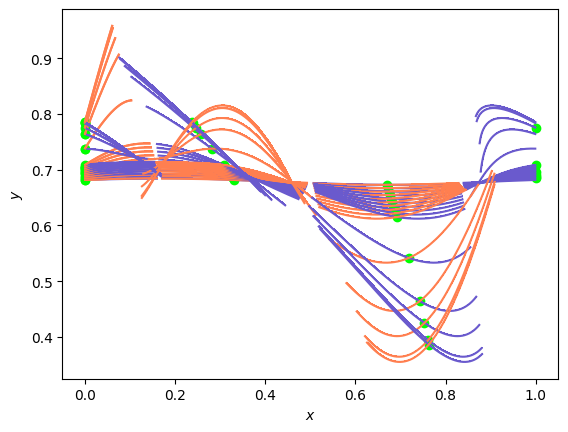

In [188]:
limite = 0.2
contador=0
for i in valores1[2:16]
    contador += 1
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],"coral")
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],"coral")
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"slateblue")
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"coral")
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"slateblue")
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"coral")
    #GraficarMap(Mapeo1)
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)
end
#savefig("variedadesestperiodo3kvar.pdf")

## Parametrización de la órbita de periodo 11.

In [166]:
listaperiodo11valores = []
for i in valores1[2:20]
    listaper11V1 = iterar(mapeo1variable["MapeoC$i"],periodo11M["periodo11M$i"],11,1)
    append!(listaperiodo11valores, [listaper11V1])
end

In [174]:
VariedadesEstablesP11 = []
VariedadesInestablesP11 = []
VariedadesEstablesP11a = []
VariedadesInestablesP11a = []
VariedadesEstablesP11b = []
VariedadesInestablesP11b = []
VariedadesEstablesP11c = []
VariedadesInestablesP11c = []
VariedadesEstablesP11d = []
VariedadesInestablesP11d = []
VariedadesEstablesP11e = []
VariedadesInestablesP11e = []
VariedadesEstablesP11f = []
VariedadesInestablesP11f = []
VariedadesEstablesP11g = []
VariedadesInestablesP11g = []
VariedadesEstablesP11h = []
VariedadesInestablesP11h = []
VariedadesEstablesP11i = []
VariedadesInestablesP11i = []
VariedadesEstablesP11j = []
VariedadesInestablesP11j = []
listafu11 = []
listafs11 = []
listafu11a = []
listafs11a = []
listafu11b = []
listafs11b = []
listafu11c = []
listafs11c = []
listafu11d = []
listafs11d = []
listafu11e = []
listafs11e = []
listafu11f = []
listafs11f = []
listafu11g = []
listafs11g = []
listafu11h = []
listafs11h = []
listafu11i = []
listafs11i = []
listafu11j = []
listafs11j = []

Orden = 70
contador = 1
for i in valores1[2:20]
    print(i,"\t") 
    # ------------ primer punto de la orbita
    Wu2V1,fu2V1,vecu2,valu2 = Inestable(composicionesf11["compop11V$i"], Orden , 
                                periodo11M["periodo11M$i"], tiempo, delta_t);
    Ws2V1,fs2V1,vecs2,vals2 = Inestable(composicionesIf11["compopI11V$i"], Orden , 
                                periodo11M["periodo11M$i"], tiempo, delta_t); 
    #------------segundo punto de la orbita
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    Wu2V1a,fu2V1a,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p2,
         tiempo, delta_t);
    Ws2V1a,fs2V1a,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p2,
        tiempo, delta_t); 
    #-------------tercer punto de la orbita
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    Wu2V1b,fu2V1b,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p3,
         tiempo, delta_t);
    Ws2V1b,fs2V1b,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p3,
        tiempo, delta_t); 
    #-------------cuarto punto de la orbita
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    Wu2V1c,fu2V1c,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p4,
         tiempo, delta_t);
    Ws2V1c,fs2V1c,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p4,
        tiempo, delta_t); 
    #-------------quinto punto de la orbita
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    Wu2V1d,fu2V1d,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p5,
         tiempo, delta_t);
    Ws2V1d,fs2V1d,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p5,
        tiempo, delta_t); 
    #-------------sexto punto de la orbita
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    Wu2V1e,fu2V1e,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p6,
         tiempo, delta_t);
    Ws2V1e,fs2V1e,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p6,
        tiempo, delta_t); 
    #-------------septimo punto de la orbita
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    Wu2V1f,fu2V1f,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p7,
         tiempo, delta_t);
    Ws2V1f,fs2V1f,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p7,
        tiempo, delta_t); 
    #-------------octavo punto de la orbita
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    Wu2V1g,fu2V1g,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p8,
         tiempo, delta_t);
    Ws2V1g,fs2V1g,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p8,
        tiempo, delta_t); 
    #-------------noveno punto de la orbita
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    Wu2V1h,fu2V1h,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p9,
         tiempo, delta_t);
    Ws2V1h,fs2V1h,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p9,
        tiempo, delta_t); 
    #-------------decimo punto de la orbita
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    Wu2V1i,fu2V1i,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p10,
         tiempo, delta_t);
    Ws2V1i,fs2V1i,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p10,
        tiempo, delta_t);
    #-------------onceavo punto de la orbita
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    Wu2V1j,fu2V1j,vecu2a,valu2a = Inestable(composicionesf11["compop11V$i"], Orden ,p11,
         tiempo, delta_t);
    Ws2V1j,fs2V1j,vecs2a,vals2a = Inestable(composicionesIf11["compopI11V$i"], Orden , p11,
        tiempo, delta_t);
    # todas las estables
    append!(VariedadesEstablesP11,[Ws2V1])
    append!(VariedadesEstablesP11a,[Ws2V1a])
    append!(VariedadesEstablesP11b,[Ws2V1b])
    append!(VariedadesEstablesP11c,[Ws2V1c])
    append!(VariedadesEstablesP11d,[Ws2V1d])
    append!(VariedadesEstablesP11e,[Ws2V1e])
    append!(VariedadesEstablesP11f,[Ws2V1f])
    append!(VariedadesEstablesP11g,[Ws2V1g])
    append!(VariedadesEstablesP11h,[Ws2V1h])
    append!(VariedadesEstablesP11i,[Ws2V1i])
    append!(VariedadesEstablesP11j,[Ws2V1j])
    # todas las inestables
    append!(VariedadesInestablesP11,[Wu2V1])
    append!(VariedadesInestablesP11a,[Wu2V1a])
    append!(VariedadesInestablesP11b,[Wu2V1b])
    append!(VariedadesInestablesP11c,[Wu2V1c])
    append!(VariedadesInestablesP11d,[Wu2V1d])
    append!(VariedadesInestablesP11e,[Wu2V1e])
    append!(VariedadesInestablesP11f,[Wu2V1f])
    append!(VariedadesInestablesP11g,[Wu2V1g])
    append!(VariedadesInestablesP11h,[Wu2V1h])
    append!(VariedadesInestablesP11i,[Wu2V1i])
    append!(VariedadesInestablesP11j,[Wu2V1j])
   #listas de vectores estables
    append!(listafu11, [fu2V1])
    append!(listafu11a, [fu2V1a])
    append!(listafu11b, [fu2V1b])
    append!(listafu11c, [fu2V1c])
    append!(listafu11d, [fu2V1d])
    append!(listafu11e, [fu2V1e])
    append!(listafu11f, [fu2V1f])
    append!(listafu11g, [fu2V1g])
    append!(listafu11h, [fu2V1h])
    append!(listafu11i, [fu2V1i])
    append!(listafu11j, [fu2V1j])
    
    #lista de vectores inestables
    append!(listafs11, [fs2V1])
    append!(listafs11a, [fs2V1a])
    append!(listafs11b, [fs2V1b])
    append!(listafs11c, [fs2V1c])
    append!(listafs11d, [fs2V1d])
    append!(listafs11e, [fs2V1e])
    append!(listafs11f, [fs2V1f])
    append!(listafs11g, [fs2V1g])
    append!(listafs11h, [fs2V1h])
    append!(listafs11i, [fs2V1i])
    append!(listafs11j, [fs2V1j]);
    contador += 1
end




1	2	3	4	5	6	7	8	9	10	20	30	35	39	40	41	42	43	44	

Graficas por partes

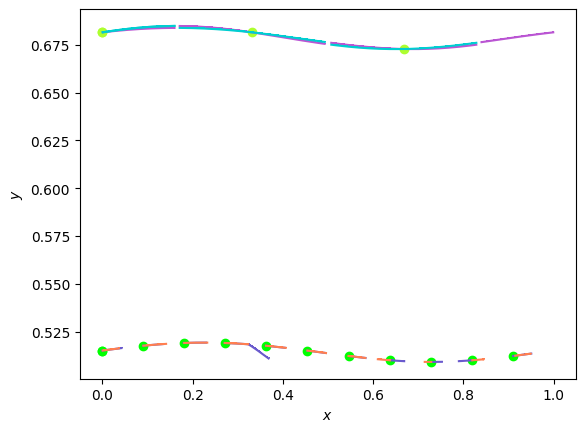

PyObject <matplotlib.collections.PathCollection object at 0x7f0d215848b0>

In [175]:
i=1
contador=1
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [0.00003, 0.036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.069,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.02, -0.0002],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.06,-0.000005],1.0e-4,p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.06],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.06],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],"mediumorchid")
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],"mediumorchid")
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],"darkturquoise")
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],"darkturquoise")
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"mediumorchid")
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"darkturquoise")
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"mediumorchid")
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"darkturquoise")



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "greenyellow")
    #ylim(0.65,0.7)

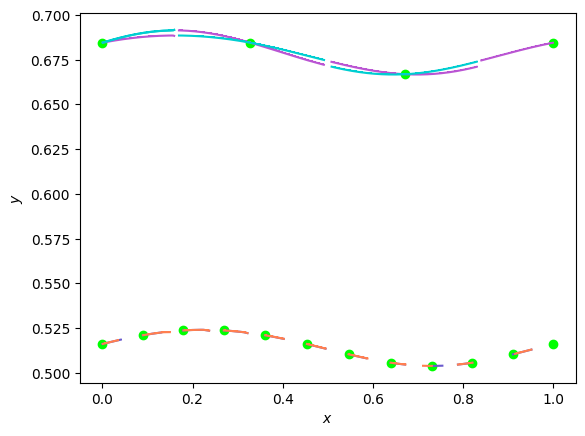

PyObject <matplotlib.collections.PathCollection object at 0x7f0d214ca7c0>

In [176]:
i=2
contador=2
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.06,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.02, -0.0002],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.06,-0.000005],1.0e-4,p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.06],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.06],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

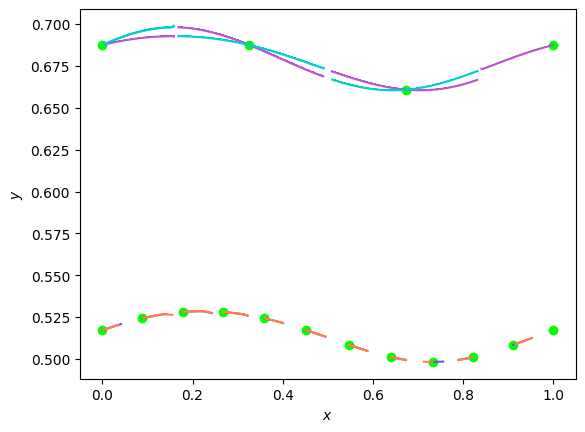

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1a693190>

In [177]:
i=3
contador=3
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.06,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.02, -0.0002],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.06,-0.000005],1.0e-4,p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.06],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.06],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

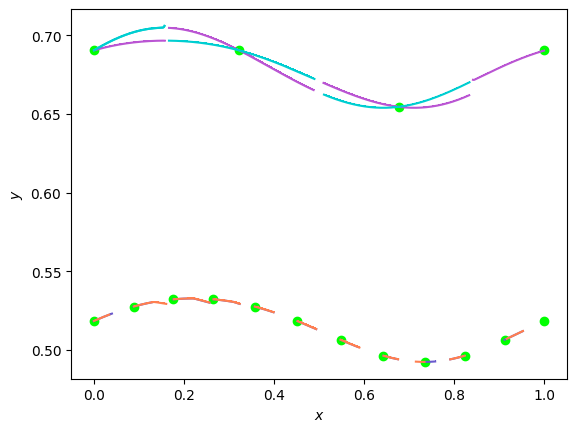

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1a5d7b80>

In [178]:
i=4
contador=4
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.06,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.02, -0.0002],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.06,-0.000005],1.0e-4,p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.06],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.06],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

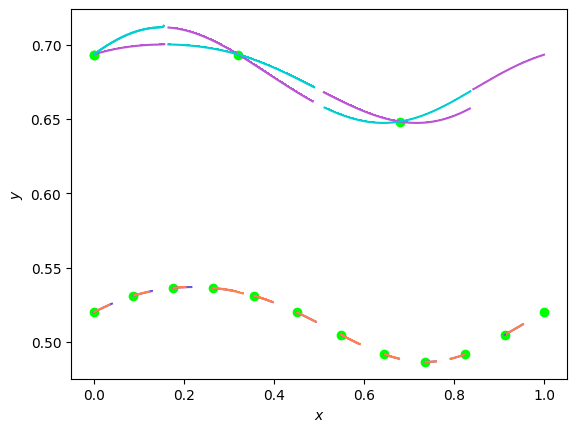

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1a5240d0>

In [179]:
i=5
contador=5
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

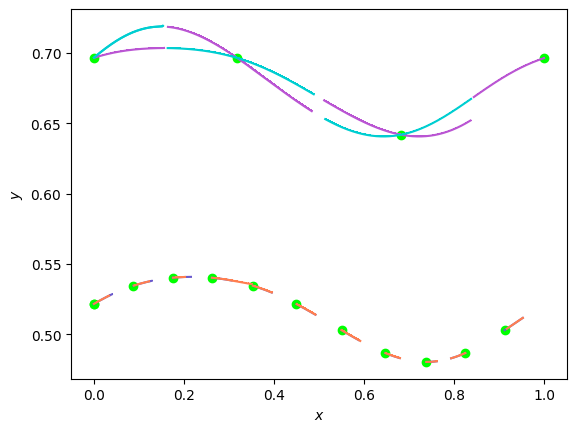

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1a45e640>

In [180]:
i=6
contador=6
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

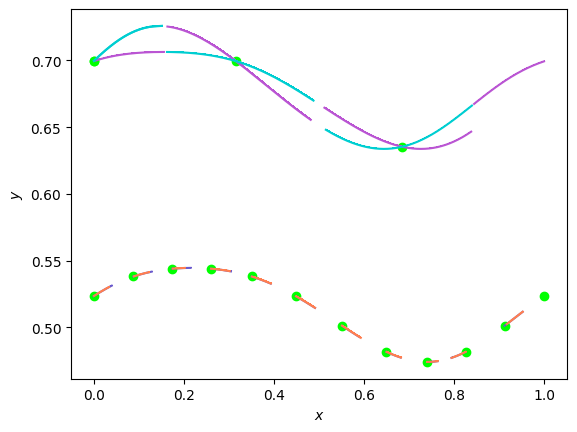

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1a39bbb0>

In [181]:
i=7
contador=7
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.05, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

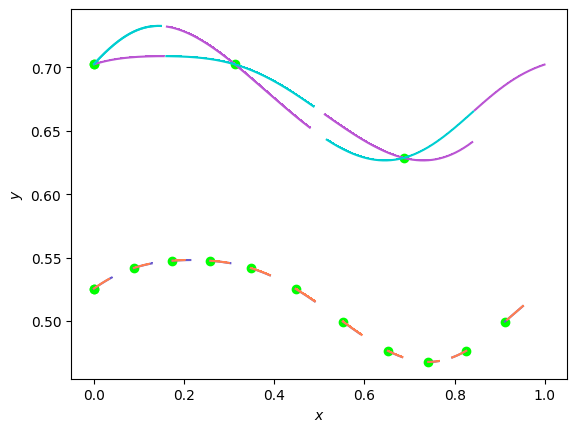

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1c7fe2b0>

In [182]:
i=8
contador=8
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.05, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

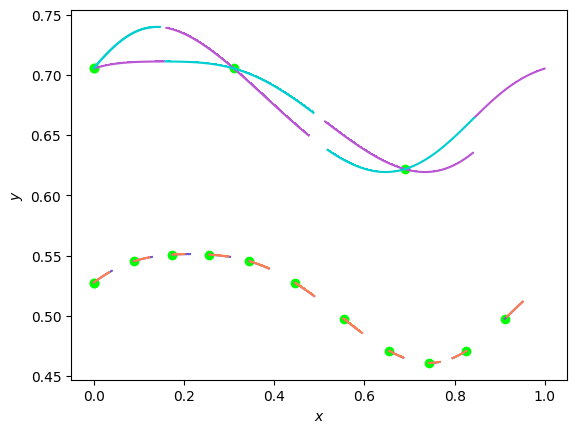

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1b0a8100>

In [183]:
i=9
contador=9
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.05, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

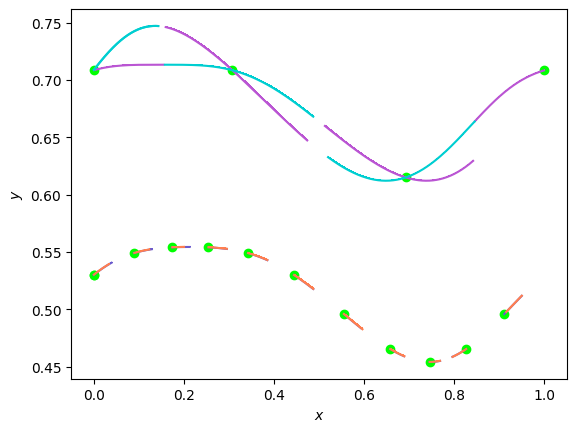

PyObject <matplotlib.collections.PathCollection object at 0x7f0d1db4fcd0>

In [184]:
i=10
contador=10
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, -0.000036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.05,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.05, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [0.0002, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,-0.0002],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)

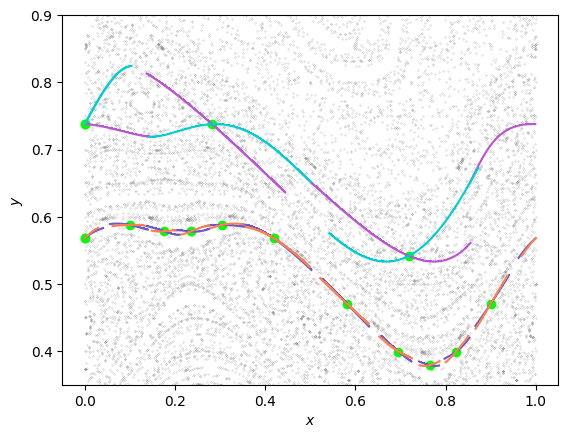

(0.35, 0.9)

In [185]:
i=20
contador=11
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesEstablesP11[contador], [0.000005,0.05],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [-0.04, -0.00004],1.0e-4, periodo11M["periodo11M$i"],"coral")
    evaluar(VariedadesInestablesP11[contador], [0.000004, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.1,0.1],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.1, 0.1],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.06,0.06],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [-0.06, 0.06],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,0.05],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, 0.05],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [-0.036,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.036, 0.036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.055,0.05],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.05, 0.056],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,0.025],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.025, 0.025],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.05,0.05],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [-0.03, 0.03],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.04,0.045],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.04, 0.047],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,0.05],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [-0.04, 0.04],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.07,0.07],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.07, 0.07],1.0e-4, p11,"coral")
    
    #Periodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    GraficarMap(Mapeo20)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    ylim(0.35,0.9)

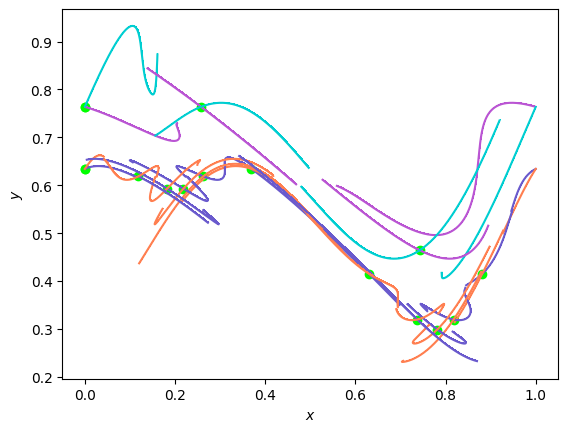

PyObject <matplotlib.collections.PathCollection object at 0x7f0d17696d60>

In [469]:
i=30
contador=12
    evaluar(VariedadesEstablesP11[contador], [-0.09,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesEstablesP11[contador], [0.000005,0.09],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [-0.1, -0.00004],1.0e-4, periodo11M["periodo11M$i"],"coral")
    evaluar(VariedadesInestablesP11[contador], [0.000004, 0.1],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.2,0.03],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.2, 0.2],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.1,0.06],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [-0.13, 0.1],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.17,0.17],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.35, 0.29],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [-0.15,0.15],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [-0.42, 0.1],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.23,0.24],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.28, 0.29],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.26,0.07],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.25, 0.2],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.39,0.23],1.0e-4, p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [-0.16, 0.18],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.3,0.45],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.15, 0.07],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.19,0.0],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [-0.096, 0.13],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.1,0.13],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.28, 0.12],1.0e-4, p11,"coral")
    
    #PERIodo 3
    color1 ="darkturquoise"
    color2 = "mediumorchid"
    limite - 0.1
    evaluar(VariedadesEstablesP3[contador], [-0.5,-0.001],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesEstablesP3[contador], [0.001,0.52],1.0e-4,periodo3M["periodo3M$i"],color2)
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.78],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesInestablesP3[contador], [-0.8,-0.001],1.0e-4, periodo3M["periodo3M$i"],color1)
    evaluar(VariedadesEstablesP3a[contador], [-0.28,0.15],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color2)
    evaluar(VariedadesInestablesP3a[contador], [-0.19,0.14],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],color1)
    evaluar(VariedadesEstablesP3b[contador], [-0.29,0.18],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color2)
    evaluar(VariedadesInestablesP3b[contador], [-0.35,0.225],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],color1)



    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.2,0.7)

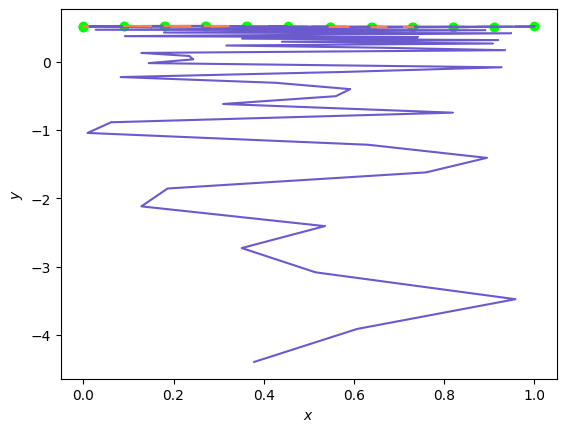

In [248]:
limite = 0.2
contador=0
for i in valores1[2:3]
    contador += 1
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"slateblue")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.04],1.0e-4, periodo11M["periodo11M$i"],"coral")
    p2 = [listaperiodo11valores[contador][1][2],listaperiodo11valores[contador][2][2]]
    evaluar(VariedadesEstablesP11a[contador], [-0.05,-0.00005],1.0e-4,p2,"slateblue")
    evaluar(VariedadesInestablesP11a[contador], [-0.05, -0.0004],1.0e-4, p2,"coral")
    p3 = [listaperiodo11valores[contador][1][3],listaperiodo11valores[contador][2][3]]
    evaluar(VariedadesEstablesP11b[contador], [-0.05,-0.00005],1.0e-4,p3,"slateblue")
    evaluar(VariedadesInestablesP11b[contador], [0.005, 0.05],1.0e-4, p3,"coral")
    p4 = [listaperiodo11valores[contador][1][4],listaperiodo11valores[contador][2][4]]
    evaluar(VariedadesEstablesP11c[contador], [-0.05,-0.000005],1.0e-4,p4,"slateblue")
    evaluar(VariedadesInestablesP11c[contador], [-0.05, -0.0005],1.0e-4, p4,"coral")
    p5 = [listaperiodo11valores[contador][1][5],listaperiodo11valores[contador][2][5]]
    evaluar(VariedadesEstablesP11d[contador], [0.0003,0.036],1.0e-4,p5,"slateblue")
    evaluar(VariedadesInestablesP11d[contador], [0.00003, 0.036],1.0e-4, p5,"coral")
    p6 = [listaperiodo11valores[contador][1][6],listaperiodo11valores[contador][2][6]]
    evaluar(VariedadesEstablesP11e[contador], [-0.069,-0.000005],1.0e-4,p6,"slateblue")
    evaluar(VariedadesInestablesP11e[contador], [-0.06, -0.00006],1.0e-4, p6,"coral")
    p7 = [listaperiodo11valores[contador][1][7],listaperiodo11valores[contador][2][7]]
    evaluar(VariedadesEstablesP11f[contador], [-0.025,-0.000005],1.0e-4,p7,"slateblue")
    evaluar(VariedadesInestablesP11f[contador], [-0.02, -0.0002],1.0e-4, p7,"coral")
    p8 = [listaperiodo11valores[contador][1][8],listaperiodo11valores[contador][2][8]]
    evaluar(VariedadesEstablesP11g[contador], [-0.06,-0.000005],1.0e-4,p8,"slateblue")
    evaluar(VariedadesInestablesP11g[contador], [0.001, 0.06],1.0e-4, p8,"coral")
    p9 = [listaperiodo11valores[contador][1][9],listaperiodo11valores[contador][2][9]]
    evaluar(VariedadesEstablesP11h[contador], [-0.036,-0.000005],1.0e-4,p9,"slateblue")
    evaluar(VariedadesInestablesP11h[contador], [-0.037, -0.0003],1.0e-4, p9,"coral")
    p10 = [listaperiodo11valores[contador][1][10],listaperiodo11valores[contador][2][10]]
    evaluar(VariedadesEstablesP11i[contador], [-0.05,-0.000005],1.0e-4,p10,"slateblue")
    evaluar(VariedadesInestablesP11i[contador], [0.001, 0.06],1.0e-4, p10,"coral")
    p11 = [listaperiodo11valores[contador][1][11],listaperiodo11valores[contador][2][11]]
    evaluar(VariedadesEstablesP11j[contador], [-0.045,-0.000005],1.0e-4,p11,"slateblue")
    evaluar(VariedadesInestablesP11j[contador], [-0.05, 0.0005],1.0e-4, p11,"coral")
    

    #GraficarMap(Mapeo1)
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)
end

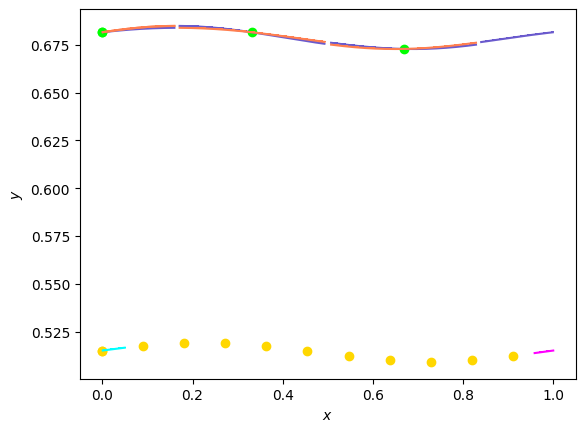

In [150]:
#juntas!!!
limite = 0.2
contador=0
for i in valores1[13:13]
    contador += 1
    evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
    evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
    evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],"coral")
    evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],"coral")
    evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"slateblue")
    evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"coral")
    evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"slateblue")
    evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"coral")
    #GraficarMap(Mapeo1)
    scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)
    evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"magenta")
    evaluar(VariedadesInestablesP11[contador], [0.001, 0.06],1.0e-4, periodo11M["periodo11M$i"],"cyan")
    scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "gold")
    #ylim(0.6,0.8)
end

In [152]:
valores1

20-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 20
 30
 35
 39
 40
 41
 42
 43
 44

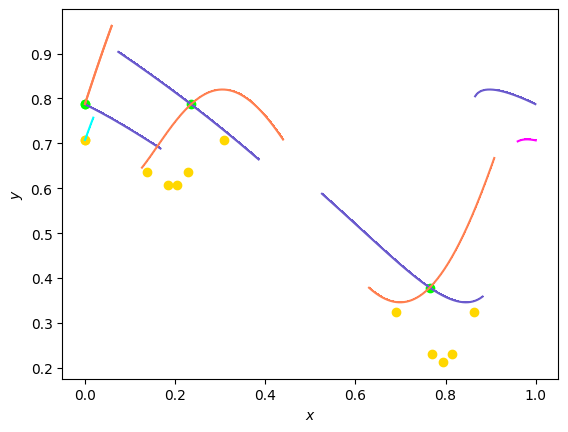

PyObject <matplotlib.collections.PathCollection object at 0x7f4b184da640>

In [153]:
i=40
contador=16
evaluar(VariedadesEstablesP3[contador], [-0.2,-0.001],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
evaluar(VariedadesEstablesP3[contador], [0.001,0.2],1.0e-4,periodo3M["periodo3M$i"],"slateblue")
evaluar(VariedadesInestablesP3[contador], [0.001, 0.2],1.0e-4, periodo3M["periodo3M$i"],"coral")
evaluar(VariedadesInestablesP3[contador], [0.001,limite],1.0e-4, periodo3M["periodo3M$i"],"coral")
evaluar(VariedadesEstablesP3a[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"slateblue")
evaluar(VariedadesInestablesP3a[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][2],listaperiodo3valores[contador][2][2]],"coral")
evaluar(VariedadesEstablesP3b[contador], [-1*limite,limite],1.0e-4,[listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"slateblue")
evaluar(VariedadesInestablesP3b[contador], [-1*limite,limite],1.0e-4, [listaperiodo3valores[contador][1][3],listaperiodo3valores[contador][2][3]],"coral")
    #GraficarMap(Mapeo1)
scatter(listaperiodo3valores[contador][1],listaperiodo3valores[contador][2],marker ="o", color  = "lime")
    #ylim(0.65,0.7)
evaluar(VariedadesEstablesP11[contador], [-0.05,-0.000005],1.0e-4,periodo11M["periodo11M$i"],"magenta")
evaluar(VariedadesInestablesP11[contador], [0.001, 0.06],1.0e-4, periodo11M["periodo11M$i"],"cyan")
scatter(listaperiodo11valores[contador][1],listaperiodo11valores[contador][2],marker ="o", color  = "gold")

🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙🚙

In [ ]:
# periodo 40 con n=20 semilla 9/20 de la s1 a la s2
# periodo 20 con n=10 semilla 9/10 de la s1 a la s2
#periodo 10 con semilla 9/10 de la s1 a la s2
# periodo 8 con semilla 7/8 n =4 de la s1 a la s2 se pierde en algun valor de b

🔴 periodo 11 con n =6 de la s1 a la s4 con semilla 0.52 

In [44]:
i = 1
pp=periodicosN(mapeo1variable["MapeoC$i"],
                simetria1v,simetria2f,1,0.82)

2-element Array{Float64,1}:
 0.0
 0.43696511454218034

In [45]:
pp[2]

0.43696511454218034

In [46]:
determinaestabilidad(pp,
                [y - valoresb["$i"]*(sin(2pi*x)), x + a*(1.0-(y - valoresb["$i"]*(sin(2pi*x)))^2)], 
                mapeo1variable["MapeoC$i"],2)



el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.5884932108121589
 1.6992549474274055
vectors:
2×2 Array{Float64,2}:
 -0.814189   0.679068
 -0.5806    -0.734076

In [47]:
Buscaperiodo(pp,mapeo1variable["MapeoC$i"],1,1e-10)

2.0

In [ ]:
compop2

In [95]:
compop11V43(x,y) = composition(Mapeo,11)(x,y)

compop11V43 (generic function with 1 method)

In [49]:
compop2V1(pp[1],pp[2])-pp

2-element Array{Float64,1}:
 0.0
 0.0

In [50]:
Orden = 10
Wu2V1,fu2V1,vecu2,valu2 = Inestable(compop2V1, Orden , 
                                pp, tiempo, delta_t);

MethodError: [91mMethodError: no method matching isless(::Complex{Float64}, ::Complex{Float64})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  isless([91m::Missing[39m, ::Any) at missing.jl:87[39m
[91m[0m  isless([91m::PyObject[39m, ::Any) at /home/evelynalvarez/.julia/packages/PyCall/tqyST/src/pyoperators.jl:75[39m
[91m[0m  isless([91m::Sym[39m, ::Number) at /home/evelynalvarez/.julia/packages/SymPy/LqUM7/src/generic.jl:14[39m
[91m[0m  ...[39m